<a href="https://colab.research.google.com/github/EmodioAI/model-development/blob/main/Audio_GAN_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conda**

In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2023-06-09 14:17:24--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2023-06-09 14:17:25--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 5.05M 11s
    50K .......... .......... .......... .......... ..........  0

In [ ]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    urllib3-1.26.8             |     pyhd3eb1b0_0         100 KB
    libstdcxx-ng-9.1.0         |       hdf63c60_0         4.0 MB
    pysocks-1.7.1              |   py36h06a4308_0          30 KB
    conda-package-handling-1.7.3|   py36h27cfd23_1         946 KB
    pip-21.2.2                 |   py36h06a4308_0         2.1 MB
    tk-8.6.12                  |       h1ccaba5_0         3.3 MB
    brotlipy-0.7.0             |py36h27cfd23_1003         349 KB
    colorama-0.4.4             |     pyhd3eb1b0_0          21 KB
    charset-normalizer-2.0.4   |     pyhd3eb1b0_0          33 KB
    libgcc-ng-9.1.0            |       hdf63c60_0         8.1 MB
    sqlite-3.38.5              |       hc218d9a_0  

urllib3-1.26.8       |  100 KB | ########## | 100% 
libstdcxx-ng-9.1.0   |  4.0 MB | ########## | 100% 
pysocks-1.7.1        |   30 KB | ########## | 100% 
conda-package-handli |  946 KB | ########## | 100% 
pip-21.2.2           |  2.1 MB | ########## | 100% 
tk-8.6.12            |  3.3 MB | ########## | 100% 
brotlipy-0.7.0       |  349 KB | ########## | 100% 
colorama-0.4.4       |   21 KB | ########## | 100% 
charset-normalizer-2 |   33 KB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
sqlite-3.38.5        |  1.5 MB | ########## | 100% 
idna-3.3             |   55 KB | ########## | 100% 
libffi-3.3           |   54 KB | ########## | 100% 
xz-5.2.5             |  389 KB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
ca-certificates-2023 |  127 KB | ########## | 100% 
ld_impl_linux-64-2.3 |  732 KB | ########## | 100% 
requests-2.27.1      |   52 KB | ########## | 100% 
certifi-2021.5.30    |  141 KB | ########## | 100% 
wheel-0.37.1

In [ ]:
!python --version

Python 3.6.13 :: Anaconda, Inc.


# **Load Repository**

In [1]:
# !git clone https://github.com/maxxies/wavegan-emotion-audio.git
!git clone https://github.com/maxxies/Audio-Synthesis-CycleGAN.git

Cloning into 'Audio-Synthesis-CycleGAN'...
remote: Enumerating objects: 386, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 386 (delta 118), reused 171 (delta 93), pack-reused 186
Receiving objects: 100% (386/386), 13.13 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (197/197), done.


In [2]:
import os
os.chdir('Audio-Synthesis-CycleGAN')

In [6]:
# for deleting folder
import shutil

shutil.rmtree('/content/Audio-Synthesis-CycleGAN', ignore_errors=True)


# **Dependencies installation**

In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.7/218.7 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.0 MB/s eta 0:00:00
  Created wheel for pyworld: filename=pyworld-0.3.3-cp310-cp310-linux_x86_64.whl size=887717 sha256=a6afaeb3baafda7b41843380272833b53dfd4d0ebe78e11fa8c19a28206079b1
  Stored in directory: /root/.cache/pip/wheels/70/50/a9/36b47c7f055bbee666a2b5718aaf85bce2152ef90f9bd10697
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=deb3473a8c180e7f7a748f0732ed3b6528beb3587b3fe7ac5ef7d987e26a4c50
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b

# Mount dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Train model

In [ ]:
!python3  train.py

Found 1523 files
0it [00:00, ?it/s]Traceback (most recent call last):
  File "/content/wavegan-emotion-audio/train.py", line 223, in <module>
    wave_gan.train()
  File "/content/wavegan-emotion-audio/train.py", line 145, in train
    disc_cost, disc_wd = self.calculate_discriminator_loss(
  File "/content/wavegan-emotion-audio/train.py", line 49, in calculate_discriminator_loss
    disc_out_gen = self.discriminator(generated)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/wavegan-emotion-audio/models.py", line 363, in forward
    x = conv(x)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/wavegan-emotion-audio/models.py", line 72, in forward
    x = self.conv1d(x)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1501, in _call_imp

# Evaluation

In [ ]:
# module imports from repository
import utils
import models
import params
import numpy as np
import pescador
import librosa
import matplotlib.pyplot as plt

In [ ]:
def visualize_audio(audio_tensor, is_monphonic=False):
    # takes a batch ,n channels , window length and plots the spectogram
    audio = audio_tensor.detach().cpu().numpy()
    plt.figure(figsize=(18, 50))
    plt.subplot(10, 2, 1)
    if is_monphonic:
        plt.title("Monophonic %i" % (1))
        librosa.display.waveshow(audio[0], sr=16000)
    else:
        D = librosa.amplitude_to_db(np.abs(librosa.stft(audio[0])), ref=np.max)
        librosa.display.specshow(D, y_axis="linear")
        plt.colorbar(format="%+2.0f dB")
        plt.title("Linear-frequency power spectrogram %i" % (i))

    plt.show()

In [ ]:
neutral_data = utils.WavDataLoader('/content/drive/MyDrive/Dataset/Emotional Speech Audio/Audios/neutral')


Found 1303 files


In [ ]:
import torch

# Load the model.
checkpoint = torch.load("/content/drive/MyDrive/Dataset/Emotional Speech Audio/gan_happy_exp1.tar")
model_state_dict = checkpoint['generator']

# Create a new instance of the model.
model = models.WaveGANGenerator(slice_len = 65536 ,model_size=32,use_batch_norm=False,num_channels=1) 

# Load the state_dict into the model.
model.load_state_dict(model_state_dict)

# Set the model to evaluation mode.
model.eval()


WaveGANGenerator(
  (fc1): Linear(in_features=100, out_features=16384, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv_list): ModuleList(
    (0): Transpose1dLayer(
      (transpose_ops): Sequential(
        (0): ConstantPad1d(padding=(12, 12), value=0)
        (1): Conv1d(1024, 512, kernel_size=(25,), stride=(1,))
      )
    )
    (1): Transpose1dLayer(
      (transpose_ops): Sequential(
        (0): ConstantPad1d(padding=(12, 12), value=0)
        (1): Conv1d(512, 256, kernel_size=(25,), stride=(1,))
      )
    )
    (2): Transpose1dLayer(
      (transpose_ops): Sequential(
        (0): ConstantPad1d(padding=(12, 12), value=0)
        (1): Conv1d(256, 128, kernel_size=(25,), stride=(1,))
      )
    )
    (3): Transpose1dLayer(
      (transpose_ops): Sequential(
        (0): ConstantPad1d(padding=(12, 12), value=0)
        (1): Conv1d(128, 64, kernel_size=(25,), stride=(1,))
      )
    )
    (4): Transpose1dLayer(
   

In [ ]:
# Generate random index
random_index = np.random.randint(0,10)

In [ ]:
# Select an audio based on index
test_audio=next(neutral_data)[random_index]

In [ ]:
test_audio.shape

torch.Size([1, 65536])

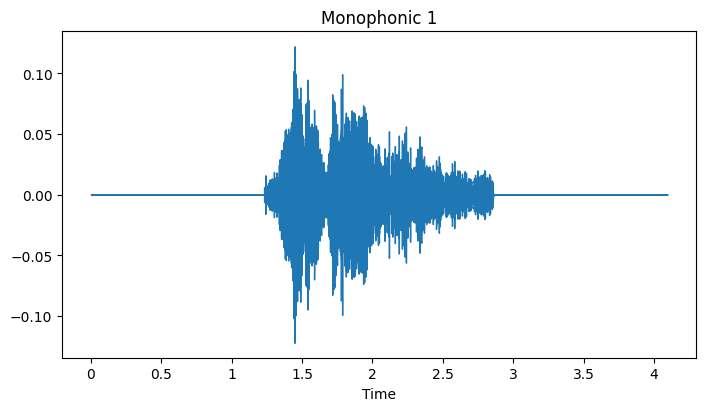

In [ ]:
# plot selected audio
visualize_audio(test_audio, is_monphonic=True)


In [ ]:
device = next(model.parameters()).device
print(device)

cpu


In [ ]:
reshaped_input = test_audio.reshape(100, 16384)
input_tensor = torch.tensor(reshaped_input)

RuntimeError: ignored

In [ ]:
# Make predictions.
with torch.no_grad():
  predictions = model(test_audio.to(device))

# Print the predictions.
print(predictions)

RuntimeError: ignored

# **CycleGAN**

In [3]:
from params import train_A_dir, train_B_dir
import train

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# data_A_norm,data_B_norm = train.prepare_data(train_A_dir,train_B_dir)

Preprocessing Data...


World Encode Data:   0% ETA:  --:--:--                                         

Train data A: 1303 loaded
Train data B: 1523 loaded



World Encode Data: 100% Time:  0:24:46                                         
World Encode Data: 100% Time:  0:27:50                                         


Log Pitch A
Mean: 4.982039, Std: 0.329123
Log Pitch B
Mean: 5.253433, Std: 0.428523
Input data fixed.
Preprocessing Done.
Time Elapsed for Data Preprocessing: 00:53:32


In [ ]:
# import numpy as np
# import pickle
# #saving arr as a .pickle file externally, wb-write binary
# pickle.dump(data_A_norm,open("arrays_1.pickle","wb"))

In [ ]:
# pickle.dump(data_B_norm,open("arrays_2.pickle","wb"))

In [4]:
import pickle

#Below is to read and retrieve its contents, rb-read binary
with open("/content/drive/MyDrive/Dataset/Emotional Speech Audio/arrays_1.pickle", "rb") as f:
    data_A_norm = pickle.load(f, encoding="latin1") 
print(len(data_A_norm))
#Below is to read and retrieve its contents, rb-read binary
with open("/content/drive/MyDrive/Dataset/Emotional Speech Audio/arrays_2.pickle", "rb") as f:
    data_B_norm = pickle.load(f, encoding="latin1") 
print(len(data_B_norm))

1303
1523


In [ ]:
len(data_A_norm)

1303

In [5]:
train.train(data_A_norm,data_B_norm,0)

AttributeError: ignored

In [ ]:
# import model

# model.CycleGAN(num_features=24)

Instructions for updating:
non-resource variables are not supported in the long term
